In [776]:
%pylab inline
qpm_dir = '/mnt/store1/oliverphilcox/QPM_Full2/'

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['diff', 'cov', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [777]:
full_minmock = 1
full_maxmock = 1000
N_full = full_maxmock - full_minmock + 1

In [527]:
t = loadtxt(qpm_dir+'0001_corr.dat')
rr = t[:,-1]
N_bins = len(rr)
input_mu = t[:,0]
m=len(np.unique(input_mu))
input_r = t[:,1]
n = len(np.unique(input_r))
all_r = np.unique(input_r)
all_mu = np.unique(input_mu)

In [528]:
dd=t[:,-3]

Compute summed mock galaxy weights

In [483]:
sumW_DD = np.load('/mnt/store1/oliverphilcox/DR12_QPM/sumW_DD.npy')

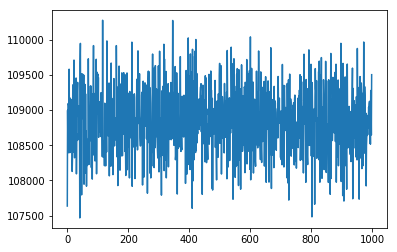

In [484]:
plt.plot(sumW_DD)

Load in corrfunc DD counts

In [395]:
mock1 = np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/processed/qpm_galaxy_1.xyzwj')
sumW = np.sum(mock1[:,3])
dd_cf = np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/DDcounts.dat')

In [555]:
rr_cf = np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/RRcounts_n45_m10.dat')*sumWran**2.

In [406]:
rand1 = np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/qpm_randoms_10x.xyzwj')

In [556]:
sumWran = np.sum(rand1[:,3])

In [574]:
rand_ratio=np.sqrt(np.mean(rr/rr_cf*2))

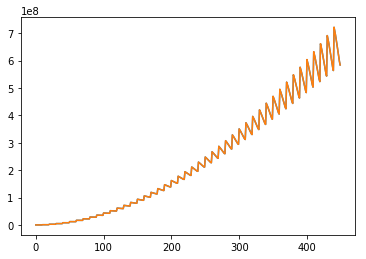

In [575]:
plt.plot(rr_cf/2*rand_ratio**2.)
plt.plot(rr)

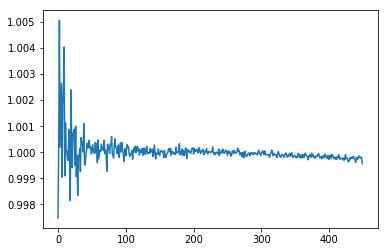

In [577]:
plt.plot(rr_cf/2.*rand_ratio**2./rr)

In [578]:
sumRR=sumWran*np.mean(np.sqrt((2.*rr)/(rr_cf)))

In [579]:
cf_rr=np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/binned_pair_counts_n35_m10_j169_11.dat')*sumWran**2.

In [580]:
len(rand1)

6420510

In [469]:
dat1=np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/processed/qpm_galaxy_1.xyzwj')

load qpm matrices

In [654]:
full_xi_qpm = zeros((N_full,N_bins))
N_gal_ratio = zeros((N_full))

for i in range(full_minmock,full_maxmock+1):
    mocknum = str(i).zfill(4)
    t = loadtxt(qpm_dir+mocknum+'_corr.dat')
    dd = t[:,-3]
    dr = t[:,-2]
    
    j = i - full_minmock
    
    this_rr = rr/sumRR**2.
    this_dr = dr/(sumRR*sumW_DD[j])
    this_dd = dd/sumW_DD[j]**2.
    
    #ratio = np.sqrt(np.sum(rr)/np.sum(dd)) 
    
    
    #N_gal_ratio[j] = np.sqrt(np.sum(dd))
    full_xi_qpm[j] = this_dd/this_rr-this_dr/this_rr+1.
    #full_xi_qpm[j] = (ratio**2) * dd/rr - (ratio) * dr/rr + 1

#N_gal_ratio/=N_gal_ratio[0]

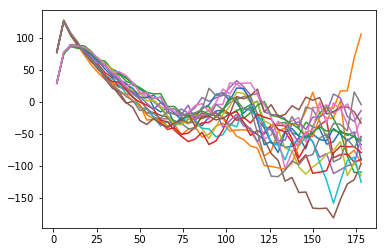

In [655]:
for i in range(1,10):
    plt.plot(all_r,full_xi_qpm.reshape(1000,n,m)[i,:,-2]*all_r*all_r)
    plt.plot(all_r,full_xi_qpm.reshape(1000,n,m)[i,:,-1]*all_r*all_r)

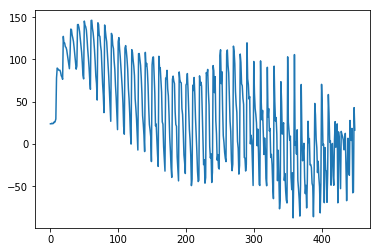

In [656]:
plt.plot(input_r*input_r*full_xi_qpm[0])

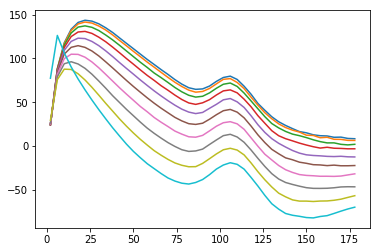

In [657]:
for i in range(10):
    plt.plot(np.unique(input_r),full_xi_qpm.mean(axis=0).reshape(-1,10)[:,i]*np.unique(input_r)**2.)

Save mean xi

In [658]:
qpm_mean_xi = full_xi_qpm.mean(axis=0).reshape(n,m)

outname = '/mnt/store1/oliverphilcox/Mock1QPM4/mean_xi.xi'
with open(outname,"w+") as outfile:
    for r in all_r:
        outfile.write("%.8e "%r)
    outfile.write("\n")
    for mu in all_mu:
        outfile.write("%.8e "%mu)
    outfile.write("\n")
    for i in range(n):
        for j in range(m):
            outfile.write("%.8e "%qpm_mean_xi[i,j])
        outfile.write("\n")

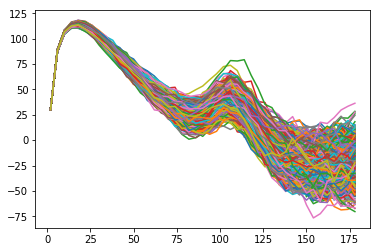

In [659]:
for i in range(999):
    plt.plot(all_r,all_r**2.*full_xi_qpm[i].reshape(-1,10).mean(axis=1))

Plot this against Rascal input xi

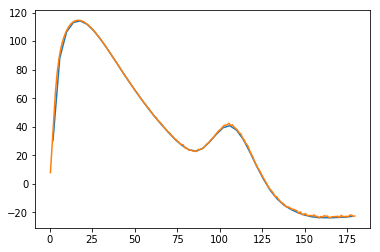

In [660]:
plt.plot(all_r,all_r**2.*qpm_mean_xi.mean(axis=1))
xi_rascal = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM4/RascalXi.xi',skiprows=2)
r_rascal = np.arange(0.5,180.5,1.)
plt.plot(r_rascal,r_rascal**2*xi_rascal.mean(axis=1))

Compute covariance of other mocks - use 40->180 binning here for comparison with code.

In [693]:
other_mocks = full_xi_qpm[100:,100:] # excluding mock 1-100
n_mocks = len(other_mocks)

mean_xi = np.mean(other_mocks,axis=0)
diff = other_mocks-mean_xi
qpm_covariance = np.matmul(diff.T,diff)/(n_mocks-1.)

In [668]:
these_r = np.arange(42,182,4)

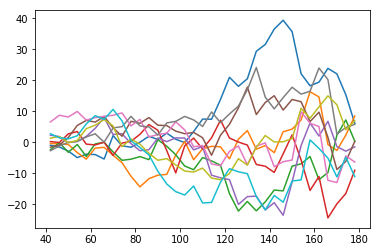

In [677]:
for mock in range(10):
    plt.plot(these_r,these_r**2.*(other_mocks[mock]-mean_xi).reshape(35,10).mean(axis=1))

In [682]:
np.matmul(diff.T,diff).shape

(350, 350)

In [617]:
other_mocks.shape

(900, 350)

## Consider trying to remove bias in inversion:

In [789]:
mean_mocks = full_xi_qpm[100:200,100:] # excluding mock 1-100
small_mean_xi = np.mean(mean_mocks,axis=0)
var_mocks = full_xi_qpm[200:,100:]

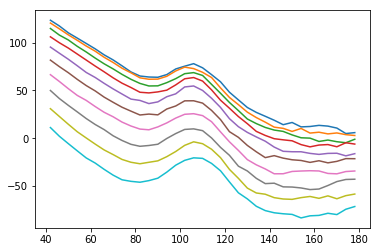

In [787]:
for i in range(10):
    plt.plot(these_r,these_r**2.*small_mean_xi.reshape(35,10)[:,i])

In [877]:
n_s=80
n_mock=len(var_mocks)
n_sub = n_mock//n_s
indiv_cov = np.zeros((n_s,len(small_mean_xi),len(small_mean_xi)))
iden = np.eye(len(small_mean_xi))
for index in range(n_s):
    these_mocks = var_mocks[index*n_sub:(index+1)*n_sub]
    diff = these_mocks - small_mean_xi
    this_cov = np.matmul(diff.T,diff)
    indiv_cov[index]=this_cov*n_s/n_mock
cov_est = np.mean(indiv_cov,axis=0)
tmp=0.
for index in range(n_s):
    other_cov = np.mean(list(indiv_cov[:index])+list(indiv_cov[index+1:]),axis=0)
    tmp+=np.matmul(np.linalg.inv(other_cov),indiv_cov[index])
D_matrix = (n_s-1.)/n_s*(-iden+tmp/n_s)

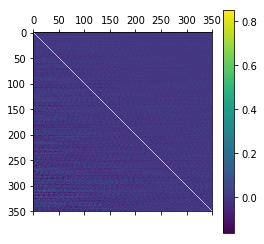

In [871]:
plt.matshow(D_matrix);plt.colorbar()

In [878]:
qpm_prec_corr = np.matmul(iden-D_matrix,np.linalg.inv(cov_est))

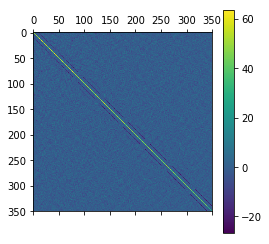

In [879]:
plt.matshow(qpm_prec_corr/r_matrix);plt.colorbar();

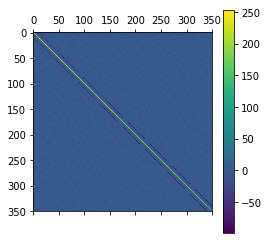

In [880]:
plt.matshow(np.linalg.inv(cov)/r_matrix);plt.colorbar()

In [816]:
n_s = 800
D_matrix = (n_s-1.)/n_s*(tmp/n_s-np.eye(len(indiv_cov[0])))

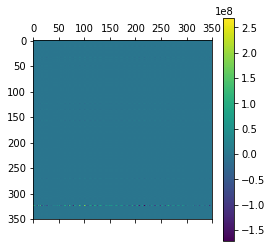

In [820]:
plt.matshow(tmp);plt.colorbar()

Compute 900 jackknife mocks by leaving out one mock in turn:

In [892]:
full_mocks = full_xi_qpm[100:,100:]
indiv_cov = []
for index in range(900):
    these_mocks = np.asarray(list(full_mocks[:index])+list(full_mocks[index+1:]))
    these_n_mocks = len(these_mocks)
    this_mean_xi = np.mean(these_mocks,axis=0)
    this_diff = these_mocks - this_mean_xi
    these_cov = np.matmul(this_diff.T,this_diff)/(these_n_mocks-1.)
    indiv_cov.append(these_cov)

In [896]:
np.save('/mnt/store1/oliverphilcox/DR12_QPM/qpm_900_jackknife_mocks.npy',indiv_cov)

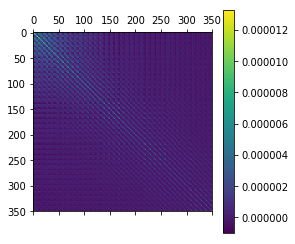

In [895]:
plt.matshow(indiv_cov[6]);plt.colorbar()

In [ ]:
other_cov

In [807]:
var_mocks.shape

(800, 350)

In [805]:
this_cov.shape

(350, 350)

In [ ]:
indiv_cov = []
for index in range(800):
    these_mocks = var_mocks[index:index+1]
    these_n_mocks = len(these_mocks)
    full_mean_xi = np.mean(other_mocks,axis=0)
    this_diff = these_mocks - full_mean_xi
    these_cov = np.matmul(this_diff.T,this_diff)/799.*10.
    indiv_cov.append(these_cov)

In [794]:
tmp=0.
for index in range(10):
    cov_excl_i = np.mean(list(indiv_cov[:index])+list(indiv_cov[index+1:]),axis=0)
    tmp+=np.matmul(np.linalg.inv(cov_excl_i),indiv_cov[index])
D_matrix = 9./10.*(-np.eye(len(indiv_cov[0]))+tmp/10.)

KeyboardInterrupt: 

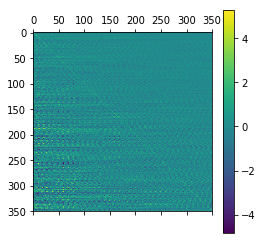

In [775]:
plt.matshow(np.matmul(np.linalg.inv(cov_excl_i),indiv_cov[-1])-np.eye(len(cov)));plt.colorbar();

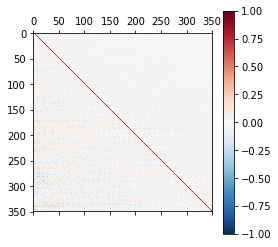

In [766]:
plt.matshow(tmp/10.-np.eye(len(indiv_cov[0])),vmax=1.,vmin=-1.,cmap=cm.RdBu_r);plt.colorbar()

In [767]:
qpm_inv = np.matmul(np.eye(len(cov))-D_matrix,np.linalg.inv(cov))

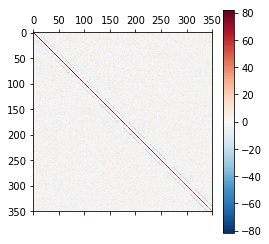

In [768]:
mat=qpm_inv/r_matrix
plt.matshow(mat,cmap=cm.RdBu_r,vmax=max(mat.ravel()),vmin=-max(mat.ravel()));plt.colorbar()

In [756]:
np.save('/mnt/store1/oliverphilcox/QPM_test_prec.npy',qpm_inv)

In [740]:
other_mocks = full_xi_qpm[100:,100:] # excluding mock 1-100
n_mocks = len(other_mocks)

mean_xi = np.mean(other_mocks,axis=0)
diff = other_mocks-mean_xi
qpm_covariance = np.matmul(diff.T,diff)/(n_mocks-1.)


In [875]:
cov=np.zeros([350,350])
mean_xi = np.mean(full_xi_qpm,axis=0)
for i in range(350):
    for j in range(350):
        cov[i,j]=np.sum((full_xi_qpm[:,i+100]-mean_xi[i+100])*(full_xi_qpm[:,j+100]-mean_xi[j+100]))/(999)

In [500]:
cov_mod=np.zeros([350,350])
weights = N_gal_ratio/np.sum(N_gal_ratio)
tmp=0.
for i in range(len(weights)):
    tmp+=full_xi_qpm[i,:]*weights[i]
mean_xi_mod=tmp/np.sum(weights)

for i in range(350):
    for j in range(350):
        cov_mod[i,j]=np.sum(weights[i]*(full_xi_qpm[:,i+100]-mean_xi_mod[i+100])*(full_xi_qpm[:,j+100]-mean_xi_mod[j+100]))
cov_mod/=1.-np.sum(weights**2.)

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [337]:
cov_mod2=np.zeros([350,350])
weights2 = 1./N_gal_ratio
weights2/=np.sum(weights2)
tmp=0.
for i in range(len(weights2)):
    tmp+=full_xi_qpm[i,:]*weights2[i]
mean_xi_mod2=tmp/np.sum(weights2)

for i in range(350):
    for j in range(350):
        cov_mod2[i,j]=np.sum(weights2[i]*(full_xi_qpm[:,i+100]-mean_xi_mod2[i+100])*(full_xi_qpm[:,j+100]-mean_xi_mod2[j+100]))
cov_mod2/=1.-np.sum(weights2**2.)

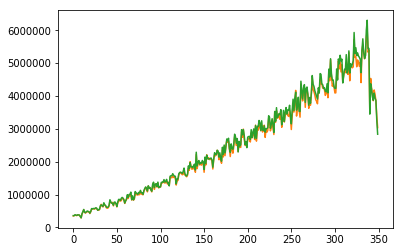

In [619]:
plt.plot(np.diag(np.linalg.inv(cov_mod)))
plt.plot(np.diag(np.linalg.inv(cov_mod2)))
plt.plot(np.diag(np.linalg.inv(cov)))

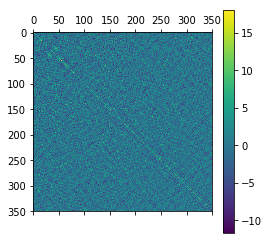

In [620]:
prec1 = np.linalg.inv(cov_mod)
prec2 = np.linalg.inv(cov_mod2)
prec0 = np.linalg.inv(cov)
plt.matshow((prec0-prec2)/r_matrix);plt.colorbar()

In [621]:
this_cov = cov
np.savez('/mnt/store1/oliverphilcox/qpm_900_mock_covariance_DDRR.npz',cov=this_cov,r_bins = all_r[10:],
        mu_bins = all_mu,prec=np.linalg.inv(this_cov),n_mocks = n_mocks)

In [640]:
cov1 = np.load('/mnt/store1/oliverphilcox/qpm_900_mock_covariance.npz')['cov']
cov2 = np.load('/mnt/store1/oliverphilcox/qpm_900_mock_covariance_DDRR.npz')['cov']

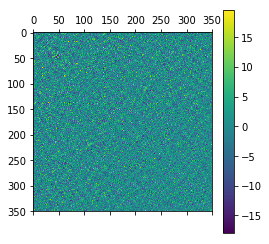

In [641]:
plt.matshow(np.linalg.inv(cov1)/r_matrix-np.linalg.inv(cov2)/r_matrix);plt.colorbar()

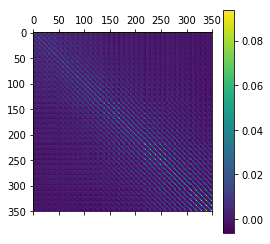

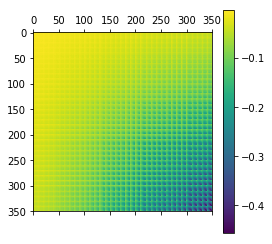

In [645]:
plt.matshow(cov1*r_matrix);plt.colorbar()
plt.matshow((cov1-cov2)*r_matrix);plt.colorbar();

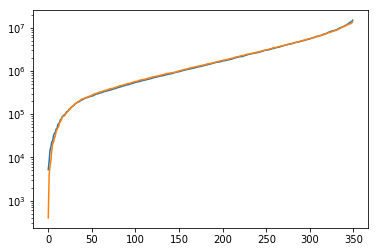

In [638]:
plt.plot(np.linalg.eigvalsh(np.linalg.inv(cov1)))
plt.plot(np.linalg.eigvalsh(np.linalg.inv(cov2)))
plt.yscale('log')

(0, 100)

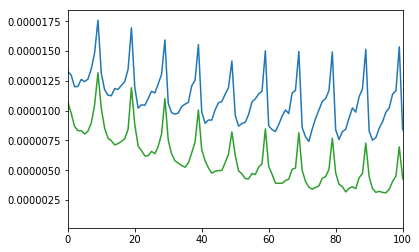

In [622]:
plt.plot(np.diag(cov))
plt.plot(np.diag(cov_mod))
plt.plot(np.diag(cov_mod2))
plt.xlim([0,100])

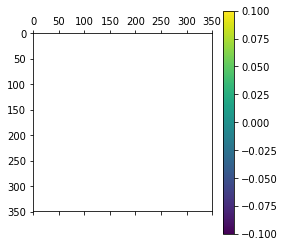

In [505]:
plt.matshow(cov_mod);plt.colorbar()

In [506]:
this_r = np.arange(42,182,4)
all_r = np.asarray([this_r[i//10] for i in range(350)])
r_matrix = np.matmul(all_r.reshape(-1,1),all_r.reshape(1,-1))

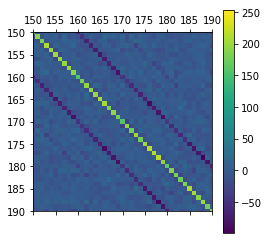

In [507]:
plt.matshow(np.linalg.inv(cov)/r_matrix);plt.colorbar();plt.ylim([190,150]);plt.xlim([150,190]);

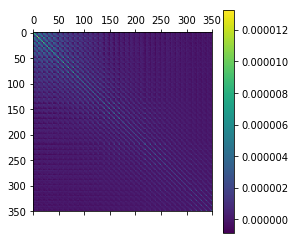

In [508]:
plt.matshow(cov);plt.colorbar();

#### Compare with 20 mock QPM matrix

In [509]:
xi_root = lambda mock_no: '/mnt/store1/oliverphilcox/DR12_QPM/xi/mock_%d/xi_n45_m10_11.dat'%mock_no
xis=[]
for i in range(1,21):
    xis.append(np.loadtxt(xi_root(i),skiprows=2).ravel())
xis = np.asarray(xis)

In [510]:
mean_xi_me = np.mean(xis,axis=0)
diff_me = (xis-mean_xi_me)[:,100:]
cov_me = np.matmul(diff_me.T,diff_me)/19.

In [511]:
np.save('/mnt/store1/oliverphilcox/DR12_QPM/cov_20.dat',cov_me)

In [512]:
these_xi = full_xi_qpm[:20]
mean_xi_these = np.mean(these_xi,axis=0)

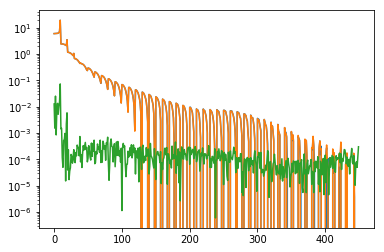

In [516]:
plt.plot(mean_xi_me)
plt.plot(mean_xi_these)
plt.yscale('log')
plt.plot(np.abs(mean_xi_me-mean_xi_these))

(0.9, 1.1)

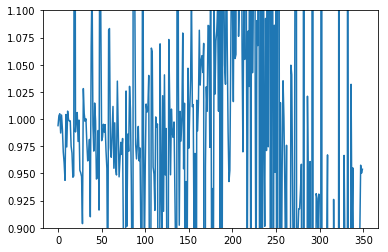

In [514]:
#plt.plot(mean_xi)
plt.plot(mean_xi_me[100:]/mean_xi[100:]);
plt.ylim([0.9,1.1])

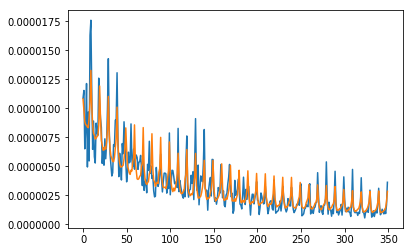

In [520]:
plt.plot(np.diag(cov_me))
plt.plot(np.diag(qpm_covariance))

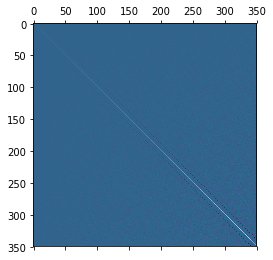

In [521]:
plt.matshow(np.linalg.inv(qpm_covariance))

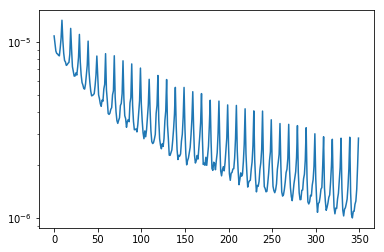

In [522]:
plt.plot(np.diag(qpm_covariance))
plt.yscale('log')

save this

In [43]:
np.savez('/mnt/store1/oliverphilcox/qpm_900_mock_covariance_3.npz',cov=qpm_covariance,r_bins = all_r[10:],
        mu_bins = all_mu,prec=np.linalg.inv(qpm_covariance),n_mocks = n_mocks)

In [19]:
np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance.npz')['cov']

array([[ 1.14593049e-05,  7.33789114e-06,  5.65651234e-06, ...,
        -6.31518005e-07, -3.68231988e-07, -3.03027557e-07],
       [ 7.33789114e-06,  1.06869429e-05,  6.28846766e-06, ...,
        -4.39306601e-07, -2.93369978e-07, -3.25037331e-07],
       [ 5.65651234e-06,  6.28846766e-06,  9.40192708e-06, ...,
        -4.35682649e-07, -4.17375142e-07, -1.43377477e-07],
       ...,
       [-6.31518005e-07, -4.39306601e-07, -4.35682649e-07, ...,
         1.52822102e-06,  8.21661946e-07,  2.53110461e-07],
       [-3.68231988e-07, -2.93369978e-07, -4.17375142e-07, ...,
         8.21661946e-07,  2.01762420e-06,  8.99129742e-07],
       [-3.03027557e-07, -3.25037331e-07, -1.43377477e-07, ...,
         2.53110461e-07,  8.99129742e-07,  2.98669369e-06]])

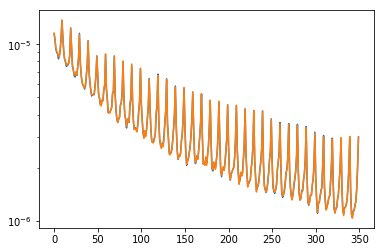

In [244]:
plt.plot(np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance.npz')['cov']))
plt.plot(np.diag(np.load('/mnt/store1/oliverphilcox/qpm_900_mock_covariance.npz')['cov']))
plt.yscale('log')

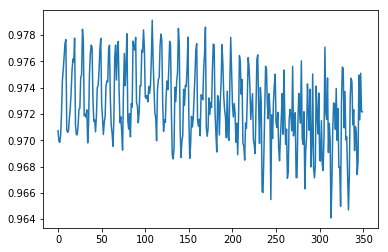

In [162]:
plt.plot(np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance.npz')['cov'])/np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance_improved.npz')['cov']))

check old functions are consistent

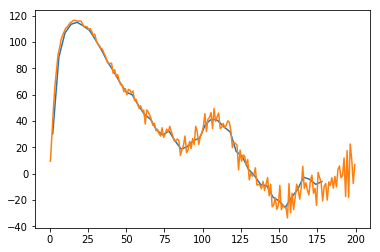

In [66]:
old_r=np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM3/xi/xi_n200_m120_11.dat',max_rows=1)
old_xi = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM3/xi/xi_n200_m120_11.dat',skip_header=2)

plt.plot(all_r,all_r**2.*full_xi_qpm[0].reshape(n,m).mean(axis=1))
plt.plot(old_r,old_r**2.*old_xi.mean(axis=1))

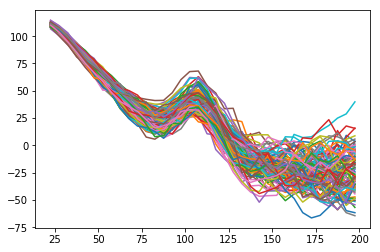

In [8]:
for i in range(98):
    plt.plot(new_r_center,all_xi[i].mean(axis=1)*new_r_center**2.)

In [9]:
flat_xi = np.asarray([xi.reshape(new_n*new_m) for xi in all_xi])
mean_xi = flat_xi.mean(axis=0)

### Compare to input QPM mock

In [235]:
xi_qpm1 = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',skiprows=2)
r_qpm = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',max_rows=1)
mu_qpm = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',max_rows=1,skip_header=1)

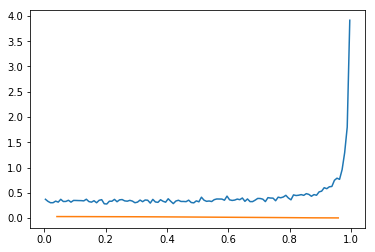

In [245]:
plt.plot(mu_qpm,xi_qpm1.mean(axis=0))
plt.plot(new_mu_bins.mean(axis=1),QPM_xi(1)[0].mean(axis=0))

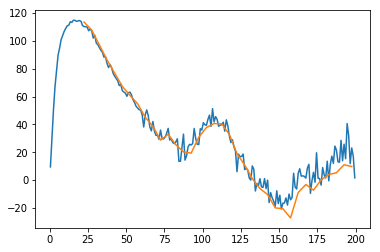

In [234]:
plt.plot(r_qpm,r_qpm*r_qpm*xi_qpm1.mean(axis=1))
plt.plot(new_r_center,new_r_center**2.*QPM_xi(1)[0].mean(axis=1))

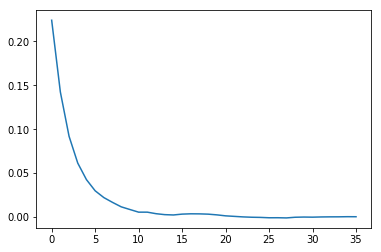

In [223]:
plt.plot(QPM_xi(1)[0].mean(axis=1))

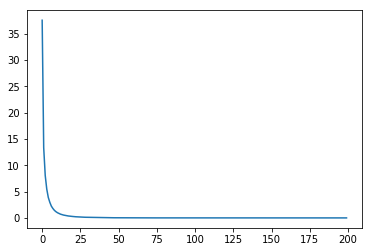

In [226]:
plt.plot(xi_qpm1.mean(axis=1))
#plt.plot(QPM_xi(1)[0].mean(axis=1))

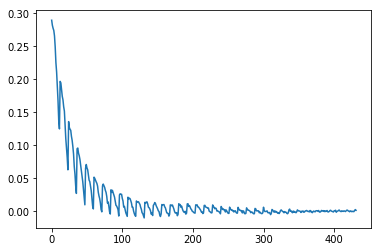

In [208]:
#plt.plot(xi_qpm1[:,:].reshape(200,120));
plt.plot(QPM_xi(1)[0].reshape(new_n*new_m));

### Check weights scalings

In [249]:
randoms = '/mnt/store1/oliverphilcox/Mock1QPM2/qpm_galaxies.xyzwj'

In [180]:
with open(randoms,"r") as infile:
    lc=0
    for line in infile:
        lc+=1
weights = np.zeros(lc)

In [181]:
with open(randoms,"r") as infile:
    for l,line in enumerate(infile):
        split_line=np.array(line.split(" "), dtype=float) 
        weights[l] = split_line[-2]

In [182]:
gal_weights = weights

In [178]:
random_weights = weights

In [192]:
(gal_weights.sum()/random_weights.sum()-0.1)*10*100

0.2828759575315143

(array([13.69594784,  4.02338886,  1.97123241,  1.15527564,  0.84001132,
         0.63512784,  0.27288596,  0.35421153,  0.30358381,  0.18422358]),
 array([0.104512 , 0.1471816, 0.1898512, 0.2325208, 0.2751904, 0.31786  ,
        0.3605296, 0.4031992, 0.4458688, 0.4885384, 0.531208 ]),
 <a list of 10 Patch objects>)

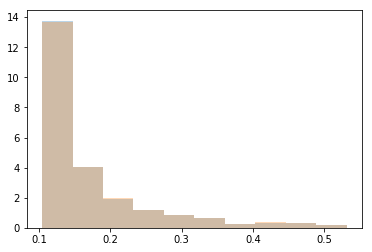

In [187]:
plt.hist(random_weights,density=True,alpha=0.3)
plt.hist(gal_weights,density=True,alpha=0.3)

In [12]:
cov = np.matmul((flat_xi-mean_xi).T,flat_xi-mean_xi)/((len(flat_xi)-1))
np.save('/mnt/store1/oliverphilcox/Mock1QPM2/98QPMCovariance.npy',cov)

In [13]:
all_cov=np.load('/mnt/store1/oliverphilcox/Mock1QPM/Rescaled_Covariance_Matrices_n39_m24_j169.npz')
theory_cov=all_cov.f.full_theory_covariance
data_jack_cov = all_cov.f.jackknife_data_covariance

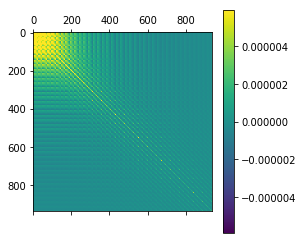

In [252]:
vmax=np.percentile(theory_cov,99.)
plt.matshow(theory_cov,vmax=vmax,vmin=-vmax);plt.colorbar();

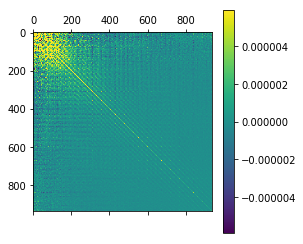

In [253]:
plt.matshow(data_jack_cov,vmax=vmax,vmin=-vmax);plt.colorbar();

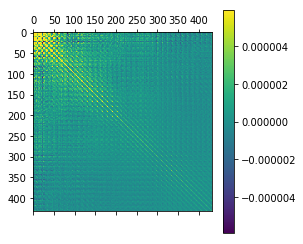

In [254]:
plt.matshow(cov,vmax=vmax,vmin=-vmax);plt.colorbar()

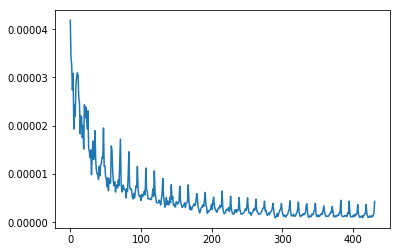

In [256]:
plt.plot(np.diag(cov),label='QPM Mocks')
#plt.plot(np.diag(theory_cov),label='Theory')
#plt.plot(np.diag(data_jack_cov),label='Jackknife Mock1')
#plt.yscale('log');plt.legend();

In [257]:
chol = np.linalg.cholesky(np.linalg.inv(theory_cov))
disc = np.matmul(chol,np.matmul(cov,chol.T))
plt.matshow(disc-np.eye(len(disc)),vmax=3,vmin=-3);plt.colorbar();

ValueError: shapes (432,432) and (936,936) not aligned: 432 (dim 1) != 936 (dim 0)